<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/Lab_ML_Automobile_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [1]:
# Principales librerías

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(10,6)})

# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Cargar Data

import pandas as pd
pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


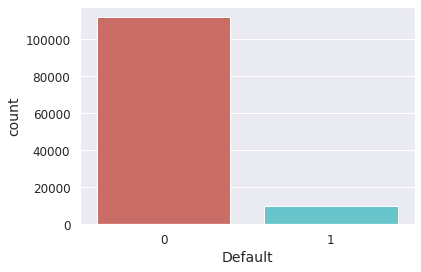

In [3]:
# Analizando el target 
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [4]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID', 'ID_Days','Default']))
features

['Client_Income_Type',
 'Homephone_Tag',
 'Social_Circle_Default',
 'Application_Process_Day',
 'Client_Occupation',
 'Own_House_Age',
 'Mobile_Tag',
 'Loan_Annuity',
 'Active_Loan',
 'Car_Owned',
 'Workphone_Working',
 'Application_Process_Hour',
 'Child_Count',
 'Client_Contact_Work_Tag',
 'Loan_Contract_Type',
 'Client_Marital_Status',
 'Client_Family_Members',
 'Client_Housing_Type',
 'Score_Source_2',
 'Accompany_Client',
 'Type_Organization',
 'Cleint_City_Rating',
 'Age_Days',
 'Credit_Amount',
 'Employed_Days',
 'Population_Region_Relative',
 'Score_Source_1',
 'Score_Source_3',
 'Bike_Owned',
 'Registration_Days',
 'Credit_Bureau',
 'Client_Income',
 'Phone_Change',
 'Client_Gender',
 'Client_Education',
 'House_Own',
 'Client_Permanent_Match_Tag']

In [5]:
features_string = list(pddf.select_dtypes(include=['object']).columns)
features_string

['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_3']

In [6]:
pddf.convert_dtypes(infer_objects=True).dtypes 

ID                              Int64
Client_Income                  object
Car_Owned                       Int64
Bike_Owned                      Int64
Active_Loan                     Int64
House_Own                       Int64
Child_Count                     Int64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               string
Client_Income_Type             string
Client_Education               string
Client_Marital_Status          string
Client_Gender                  string
Loan_Contract_Type             string
Client_Housing_Type            string
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                   Int64
Mobile_Tag                      Int64
Homephone_Tag                   Int64
Workphone_Working               Int64
Client_Occupation              string
Client_Famil

In [7]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization']

In [8]:
numeric_features = list(set(features) - set(categorical_features))
numeric_features

['Homephone_Tag',
 'Social_Circle_Default',
 'Application_Process_Day',
 'Own_House_Age',
 'Mobile_Tag',
 'Loan_Annuity',
 'Active_Loan',
 'Car_Owned',
 'Workphone_Working',
 'Application_Process_Hour',
 'Child_Count',
 'Client_Family_Members',
 'Score_Source_2',
 'Cleint_City_Rating',
 'Age_Days',
 'Credit_Amount',
 'Employed_Days',
 'Population_Region_Relative',
 'Score_Source_1',
 'Score_Source_3',
 'Bike_Owned',
 'Registration_Days',
 'Credit_Bureau',
 'Client_Income',
 'Phone_Change',
 'House_Own']

In [9]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [10]:
# convert Series

for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])


In [11]:
pddf.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [13]:
# Determinando matrices de datos

X = pddf[features + ['ID', 'Default']]
y = pddf.Default


In [24]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 123)


X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test, 
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)


## 3. Tratamiento de variables categóricas

<h3>Target Encoding</h3> 

In [14]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 813 kB/s 


In [25]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [26]:
# definiendo reglas de encoding

TargetEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [27]:
# Usando reglas de encoding

X_train[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_train[categorical_features])
X_watch[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_watch[categorical_features])
X_test[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_test[categorical_features])


## 4. Modelo

In [20]:
#Cargando librerías
import xgboost as xgb


In [28]:
X_train = X_train[numeric_features + [x + '_num' for x in categorical_features]]
X_watch = X_watch[numeric_features + [x + '_num' for x in categorical_features]]
X_test  = X_test[numeric_features + [x + '_num' for x in categorical_features]]


In [30]:
# Data to Train

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [38]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',
         'max_depth' : 5,
         'learning_rate': 0.05,
         'seed' : 123,
         'min_data_leaf' : 0.1,
         'subsample' : 0.7,
         'grow_policy' : 'lossguide'}

param['eval_metric'] = 'auc'
num_round = 300         

evallist = [(dtrain,'train'), (dwatch,'Watchlist')]


In [39]:
import time

start_time = time.time()
xgBoost = xgb.train(param, 
                    dtrain, 
                    num_round, 
                    evallist, 
                    early_stopping_rounds = 10)
print("----%s seconds ---" % ((time.time() - start_time)))


[0]	train-auc:0.705222	Watchlist-auc:0.686195
Multiple eval metrics have been passed: 'Watchlist-auc' will be used for early stopping.

Will train until Watchlist-auc hasn't improved in 10 rounds.
[1]	train-auc:0.717822	Watchlist-auc:0.699846
[2]	train-auc:0.721119	Watchlist-auc:0.703766
[3]	train-auc:0.725349	Watchlist-auc:0.706038
[4]	train-auc:0.727647	Watchlist-auc:0.70957
[5]	train-auc:0.728809	Watchlist-auc:0.709875
[6]	train-auc:0.72961	Watchlist-auc:0.71117
[7]	train-auc:0.730716	Watchlist-auc:0.712292
[8]	train-auc:0.731971	Watchlist-auc:0.713049
[9]	train-auc:0.732323	Watchlist-auc:0.713821
[10]	train-auc:0.733204	Watchlist-auc:0.7151
[11]	train-auc:0.734432	Watchlist-auc:0.716448
[12]	train-auc:0.735429	Watchlist-auc:0.71704
[13]	train-auc:0.736312	Watchlist-auc:0.717496
[14]	train-auc:0.737846	Watchlist-auc:0.718876
[15]	train-auc:0.738662	Watchlist-auc:0.71954
[16]	train-auc:0.739389	Watchlist-auc:0.720226
[17]	train-auc:0.740473	Watchlist-auc:0.720863
[18]	train-auc:0.741

<b>Variables del Modelo</b>

In [40]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

{'Score_Source_2': 1283.1592920081084,
 'Score_Source_3': 1212.7803725328993,
 'Score_Source_1': 488.2311878328,
 'Type_Organization_num': 226.94742910899987,
 'Client_Occupation_num': 121.38515676900003,
 'Employed_Days': 339.490333611,
 'Age_Days': 236.41786760058,
 'Registration_Days': 118.25118693399996,
 'Loan_Annuity': 169.56734567199996,
 'Client_Education_num': 101.284963846,
 'Population_Region_Relative': 94.94158993800004,
 'Social_Circle_Default': 140.38166401755095,
 'Cleint_City_Rating': 40.554421179,
 'Credit_Amount': 176.96225755200015,
 'Own_House_Age': 141.73536516899995,
 'Client_Gender_num': 61.623274103,
 'Phone_Change': 100.06756380159999,
 'Car_Owned': 7.706432046,
 'Client_Income': 76.42861697200001,
 'Credit_Bureau': 85.749746761,
 'Client_Family_Members': 20.584785255,
 'Child_Count': 15.755496396000002,
 'Client_Housing_Type_num': 20.848478972,
 'Workphone_Working': 5.28110731,
 'Loan_Contract_Type_num': 21.651511182999993,
 'Application_Process_Hour': 73.3823

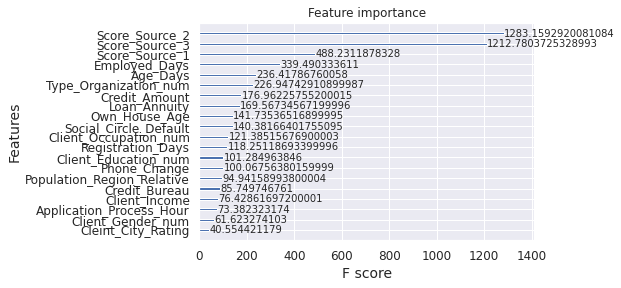

In [41]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [42]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
0,Score_Source_2,1283.159292,1
1,Score_Source_3,1212.780373,2
2,Score_Source_1,488.231188,3
5,Employed_Days,339.490334,4
6,Age_Days,236.417868,5
3,Type_Organization_num,226.947429,6
13,Credit_Amount,176.962258,7
8,Loan_Annuity,169.567346,8
14,Own_House_Age,141.735365,9
11,Social_Circle_Default,140.381664,10


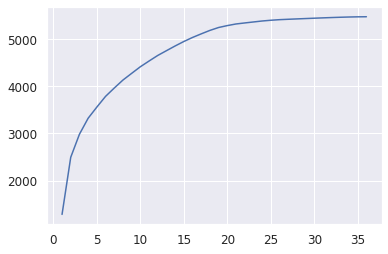

In [43]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

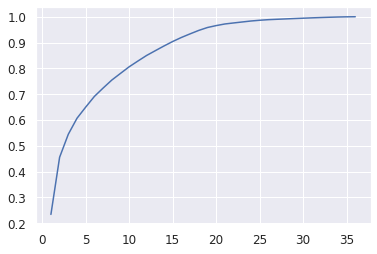

In [44]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [45]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [46]:
pdVarImp.transpose()

,0,1,2,5,6,3,13,8,14,11,...,30,32,17,27,31,29,33,23,35,34
Feature,Score_Source_2,Score_Source_3,Score_Source_1,Employed_Days,Age_Days,Type_Organization_num,Credit_Amount,Loan_Annuity,Own_House_Age,Social_Circle_Default,...,Accompany_Client_num,Client_Income_Type_num,Car_Owned,Homephone_Tag,Client_Permanent_Match_Tag_num,House_Own,Bike_Owned,Workphone_Working,Active_Loan,Client_Contact_Work_Tag_num
Importance,1283.159292,1212.780373,488.231188,339.490334,236.417868,226.947429,176.962258,169.567346,141.735365,140.381664,...,8.275986,7.759712,7.706432,7.327388,7.290489,6.763264,6.11592,5.281107,3.797341,1.803031
C,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
porc_gain,0.234271,0.221422,0.089138,0.061982,0.043164,0.041435,0.032309,0.030959,0.025877,0.02563,...,0.001511,0.001417,0.001407,0.001338,0.001331,0.001235,0.001117,0.000964,0.000693,0.000329
porc_gain_acum,0.234271,0.455693,0.544831,0.606813,0.649977,0.691412,0.723721,0.754679,0.780556,0.806186,...,0.990169,0.991586,0.992993,0.994331,0.995662,0.996897,0.998013,0.998978,0.999671,1.0


In [47]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train, label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test, label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [48]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
    

,metric,xgb_train,xgb_test
0,AUC,0.783527,0.749629
1,Gini,0.567055,0.499258
2,Accuracy,0.920780,0.919375
3,Precision,0.975207,0.576923
4,Recall,0.019976,0.007618
5,F1-score,0.039151,0.015038


# Random Search

In [ ]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [ ]:
X_train = X_train[numeric_features + [x + '_num' for x in categorical_features]]
X_test  = X_test[numeric_features + [x + '_num' for x in categorical_features]]


In [ ]:
# Data to Train

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(1000):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10     

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

In [ ]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

In [ ]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

In [ ]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.loc[pddf.overfitting < 5].sort_values(['giniTest', 'iter'], ascending=False).head(50)

In [ ]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName", 
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName", 
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')